In [1]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from scipy.stats import norm 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df_train_full= pd.read_csv('Life_Expectancy_Data.csv')

In [4]:
df_train, df_test = train_test_split(df_train_full, test_size=0.2)

# Data Exploration 

In [5]:
insert explanation of the actual data 

SyntaxError: invalid syntax (<ipython-input-5-fecaf5e5c444>, line 1)

In [6]:
df_train['GDP'].describe()

count      1980.000000
mean       7247.795557
std       13770.823910
min           1.681350
25%         461.476540
50%        1731.601010
75%        5855.341123
max      119172.741800
Name: GDP, dtype: float64

In [7]:
df_train[" BMI "].describe()

count    2323.000000
mean       38.415325
std        20.028231
min         1.000000
25%        19.200000
50%        43.500000
75%        56.100000
max        83.300000
Name:  BMI , dtype: float64

In [48]:
df_train.rename(columns={'Life expectancy ':'Life_Expectancy','Adult Mortality':'Adult_Mortality', 'infant deaths':'Infant_Deaths', 'Measles ':'Measles','Income composition of resources':'Income_Composition_Of_Resources','Hepatitis_B':'Heptatis_B'},inplace=True)

In [49]:
print(df_train.columns)

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'percentage expenditure', 'Heptatis_B',
       'Measles', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income_Composition_Of_Resources', 'Schooling'],
      dtype='object')


In [10]:
df_train_full.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

<AxesSubplot:xlabel='Life_Expectancy', ylabel='Count'>

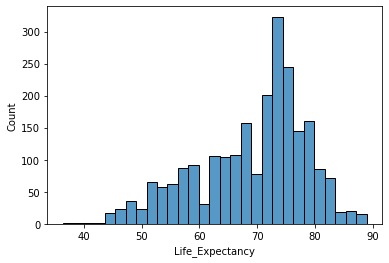

In [11]:
sns.histplot(df_train['Life_Expectancy'])

<AxesSubplot:xlabel='Life_Expectancy', ylabel='Count'>

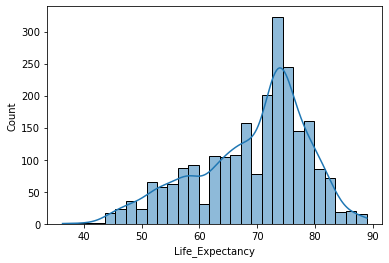

In [45]:
sns.histplot(x=df_train["Life_Expectancy"], kde = "True")

<AxesSubplot:xlabel='Heptatis_B', ylabel='Count'>

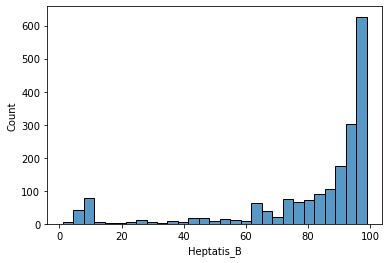

In [50]:
sns.histplot(df_train['Heptatis_B'])

<AxesSubplot:xlabel='GDP', ylabel='percentage expenditure'>

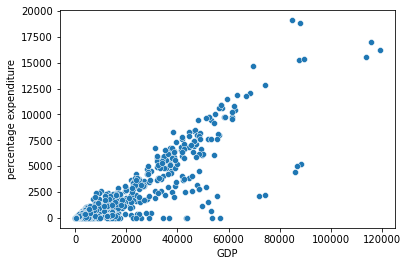

In [13]:

var = 'GDP'
sns.scatterplot(x=var, y='percentage expenditure', data=df_train)

<AxesSubplot:xlabel='GDP', ylabel='Heptatis_B'>

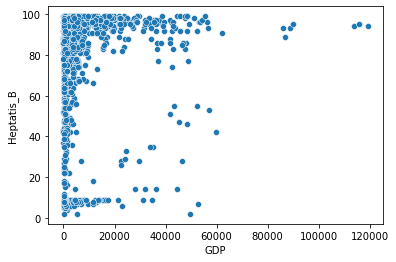

In [57]:
var = 'GDP'
sns.scatterplot(x=var, y='Heptatis_B', data=df_train)

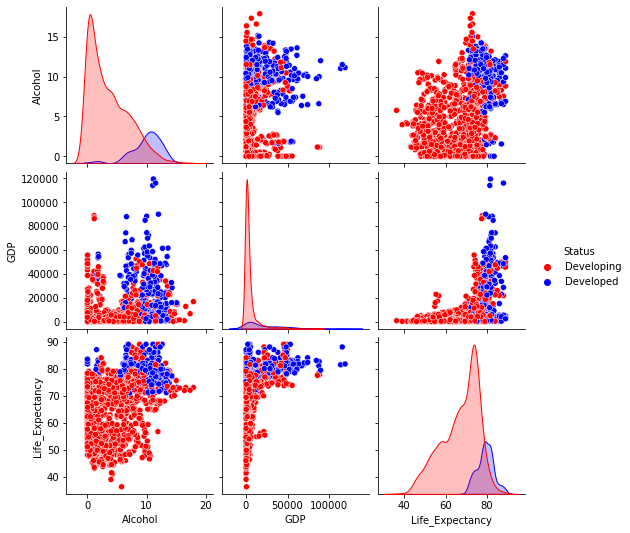

In [14]:
sns.pairplot(
    data = df_train[[ "Alcohol", "GDP", "Status", "Life_Expectancy"]],
    hue = 'Status' , palette = ['Red', 'Blue']);

In [51]:
df_copy=df_train.copy()

In [53]:
df_copy=df_copy.dropna()
df_test.dropna()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1292,Italy,2005,Developed,88.0,66.0,2,8.65,4506.255963,96.0,135,...,97.0,8.71,95.0,0.1,31959.262150,57969484.0,0.5,0.5,0.851,15.8
1000,Germany,2009,Developed,80.0,79.0,2,11.22,7641.270645,88.0,574,...,95.0,11.40,96.0,0.1,41732.772500,819237.0,1.1,1.1,0.906,16.7
1969,Panama,2005,Developing,75.8,122.0,1,5.53,623.910050,92.0,0,...,88.0,7.48,92.0,0.1,4916.548860,333465.0,2.1,2.1,0.740,12.9
1734,Montenegro,2013,Developing,75.8,19.0,0,0.01,707.144691,9.0,0,...,94.0,6.43,94.0,0.1,7186.429787,62127.0,1.8,1.9,0.799,15.1
1722,Mongolia,2009,Developing,66.9,235.0,1,4.61,134.167893,97.0,8,...,96.0,5.29,95.0,0.1,1717.898761,2668289.0,2.2,2.3,0.686,13.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,Bhutan,2009,Developing,67.4,232.0,1,0.17,27.489070,93.0,6,...,93.0,6.30,93.0,0.4,177.234497,714458.0,16.8,17.5,0.000,10.9
1008,Germany,2001,Developed,78.3,92.0,3,12.46,4057.637383,86.0,6024,...,96.0,1.15,93.0,0.1,23687.316890,82349925.0,1.2,1.1,0.860,16.2
2653,Trinidad and Tobago,2011,Developing,76.0,176.0,0,6.50,144.985071,9.0,0,...,91.0,5.60,9.0,0.4,1953.976700,1334788.0,5.9,6.2,0.774,12.6
1621,Mali,2012,Developing,57.2,27.0,53,0.01,96.546583,66.0,341,...,72.0,6.47,66.0,1.5,777.347687,16667.0,8.3,8.1,0.411,7.7


In [17]:
df_copy.head()


,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,percentage expenditure,Hepatitis_B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_Composition_Of_Resources,Schooling
1880,Niger,2012,Developing,63.0,232.0,49,0.01,29.755180,71.0,272,...,71.0,6.11,71.0,0.7,391.515524,17731634.0,1.3,1.1,0.331,5.1
2450,Sri Lanka,2006,Developing,73.8,145.0,4,1.96,120.247171,98.0,0,...,98.0,4.60,98.0,0.1,1448.761100,1952.0,15.4,15.5,0.718,13.1
2660,Trinidad and Tobago,2004,Developing,69.4,19.0,0,5.82,11.851001,94.0,0,...,94.0,5.22,94.0,1.0,129.519140,129535.0,6.3,6.8,0.736,12.2
1281,Israel,2000,Developing,78.9,76.0,1,2.53,199.934103,98.0,36,...,93.0,7.13,93.0,0.1,2152.143200,6289.0,1.1,1.1,0.845,15.2
421,Burundi,2010,Developing,56.8,33.0,23,4.16,31.141876,96.0,495,...,94.0,8.82,96.0,1.9,231.194326,876693.0,7.7,7.7,0.361,9.3


In [18]:
# Create X and y.

x = df_copy[['Adult_Mortality','Infant_Deaths']]
y = df_copy.GDP

x_array=np.array(x)
y_array=np.array(y)

#x_array=x_array.reshape(-1,1)

# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(x_array, y_array)

# Print the coefficients.
print(linreg.intercept_)
print(linreg.coef_)

9022.102617235236
[-20.7317006   -7.53047982]


In [19]:
# Create X and y.
X = df_copy[["Alcohol"]]
Y = df_copy.Adult_Mortality


In [20]:
print((type(X)))
print((type(X.values)))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [21]:
print((type(Y)))
print((type(Y.values)))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [22]:
# Create X and y.
X = df_copy[["Alcohol"]]
Y = df_copy.Adult_Mortality

# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(X, y)

# Print the coefficients.
print(linreg.intercept_)
print(linreg.coef_)

158.06728500599638
[1116.39158843]


<AxesSubplot:>

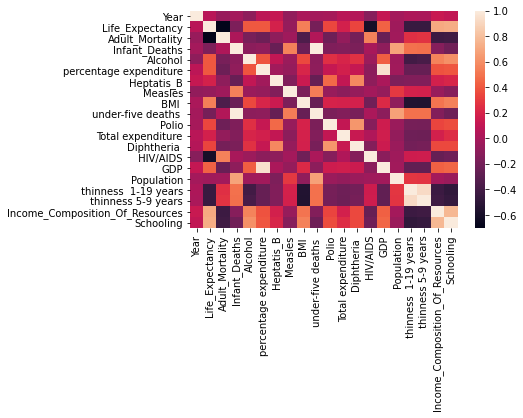

In [54]:
# Visualize correlation matrix in Seaborn using a heat map.
sns.heatmap(df_copy.corr())

In [65]:
feature_cols = ['Heptatis_B',' HIV/AIDS', 'Polio', 'Income_Composition_Of_Resources']

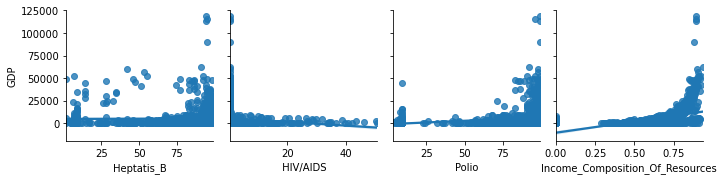

In [66]:
sns.pairplot(df_copy, x_vars=feature_cols, y_vars=['GDP'], kind='reg', diag_kind = None);

In [60]:
df_copy.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'percentage expenditure', 'Heptatis_B',
       'Measles', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income_Composition_Of_Resources', 'Schooling'],
      dtype='object')